In [ ]:
%pip install --upgrade pip
%pip install yfinance
%pip install matplotlib
%matplotlib inline
%pip install pandas
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
# Taking all the tickers in S&P 500 from the financial industry
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
financial_tickers = tickers.loc[tickers['GICS Sector'] == 'Financials']['Symbol']
tickers_list = ["".join(ticker) for ticker in financial_tickers][:5]

In [30]:
# Downloading data for all tickers
stocks = yf.download(tickers_list)
# close = stocks.loc[:,"Close"].drop(columns='BRK.B').dropna()
close = stocks.loc[:,"Close"].dropna()
print(close.tail(2))

[*********************100%%**********************]  5 of 5 completed
                  AFL        AIG         ALL         AMP         AXP
Date                                                                
2024-02-08  78.110001  68.410004  161.750000  394.829987  211.210007
2024-02-09  78.230003  69.120003  160.029999  396.940002  212.470001


In [31]:
#Storing min and max value of each stock
min_dict = {}
max_dict = {}
for ticker in tickers_list:
    min_dict[ticker] = round(close[ticker].min(), 2)
    max_dict[ticker] = round(close[ticker].max(), 2)

print(min_dict)
print(max_dict)

{'AFL': 5.74, 'ALL': 14.12, 'AXP': 10.26, 'AIG': 7.0, 'AMP': 12.37}
{'AFL': 85.73, 'ALL': 161.75, 'AXP': 212.47, 'AIG': 1456.2, 'AMP': 396.94}


In [32]:
# Normalising prices for all stocks
normclose = pd.DataFrame()
for ticker in tickers_list:
    normclose[ticker] = (close[ticker] - min_dict[ticker]) / (max_dict[ticker] - min_dict[ticker])

normclose.head()

,AFL,ALL,AXP,AIG,AMP
Date,,,,,
2005-09-15,0.208651,0.271760,0.198419,0.836323,0.064072
2005-09-16,0.214214,0.277789,0.206643,0.841154,0.063005
2005-09-19,0.214652,0.266206,0.204782,0.828043,0.063265
2005-09-20,0.212089,0.264106,0.202488,0.830251,0.063265
2005-09-21,0.205213,0.255436,0.195995,0.814932,0.062485


In [52]:
# Calculating differences / spread for each pair of stock
# Calculating Sum of squared differences for each pair
from itertools import combinations

diff_df = pd.DataFrame(index=normclose.index)
sq_sum_diff = {}

for combination in combinations(tickers_list, 2):
    combination_string = " - ".join(combination)
    diff_df[combination_string] = (normclose[combination[1]] - normclose[combination[0]]) 
    sq_sum_diff[combination_string] = sum((diff_df[combination_string])**2)

diff_df.head()

,AFL - ALL,AFL - AXP,AFL - AIG,AFL - AMP,ALL - AXP,ALL - AIG,ALL - AMP,AXP - AIG,AXP - AMP,AIG - AMP
Date,,,,,,,,,,
2005-09-15,0.063109,-0.010232,0.627672,-0.144580,-0.073342,0.564563,-0.207689,0.637905,-0.134347,-0.772252
2005-09-16,0.063575,-0.007571,0.626939,-0.151209,-0.071146,0.563365,-0.214784,0.634510,-0.143638,-0.778148
2005-09-19,0.051554,-0.009870,0.613391,-0.151386,-0.061424,0.561837,-0.202941,0.623261,-0.141516,-0.764778
2005-09-20,0.052017,-0.009601,0.618162,-0.148824,-0.061618,0.566145,-0.200841,0.627763,-0.139222,-0.766986
2005-09-21,0.050223,-0.009218,0.609719,-0.142728,-0.059441,0.559496,-0.192951,0.618938,-0.133509,-0.752447


In [34]:
# Separating pairs with the least SSD
import itertools

sq_sum_diff = dict(sorted(sq_sum_diff.items(), key=lambda item: item[1]))
least_ssd_pairs = list(dict(itertools.islice(sq_sum_diff.items(), 2)).keys())  
least_ssd_pairs 

['AFL - AXP', 'ALL - AXP']

[Timestamp('2021-06-14 00:00:00'), Timestamp('2021-08-27 00:00:00'), Timestamp('2021-09-16 00:00:00'), Timestamp('2021-12-07 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-02-08 00:00:00'), Timestamp('2022-03-17 00:00:00'), Timestamp('2022-04-04 00:00:00'), Timestamp('2022-04-25 00:00:00')]
[Timestamp('2008-04-11 00:00:00'), Timestamp('2008-04-24 00:00:00'), Timestamp('2008-06-03 00:00:00'), Timestamp('2008-06-09 00:00:00'), Timestamp('2008-06-25 00:00:00'), Timestamp('2008-09-18 00:00:00'), Timestamp('2008-09-24 00:00:00'), Timestamp('2008-12-30 00:00:00'), Timestamp('2023-09-22 00:00:00'), Timestamp('2023-12-06 00:00:00'), Timestamp('2023-12-08 00:00:00')]
[Timestamp('2021-11-09 00:00:00'), Timestamp('2021-12-09 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-02-09 00:00:00'), Timestamp('2023-06-06 00:00:00'), Timestamp('2023-06-14 00:00:00'), Timestamp('2023-06-28 00:00:00'), Timestamp('2023-08-02 00:00:00')]
[Timestamp('2020-04-14 00:00:00'), Timestamp(

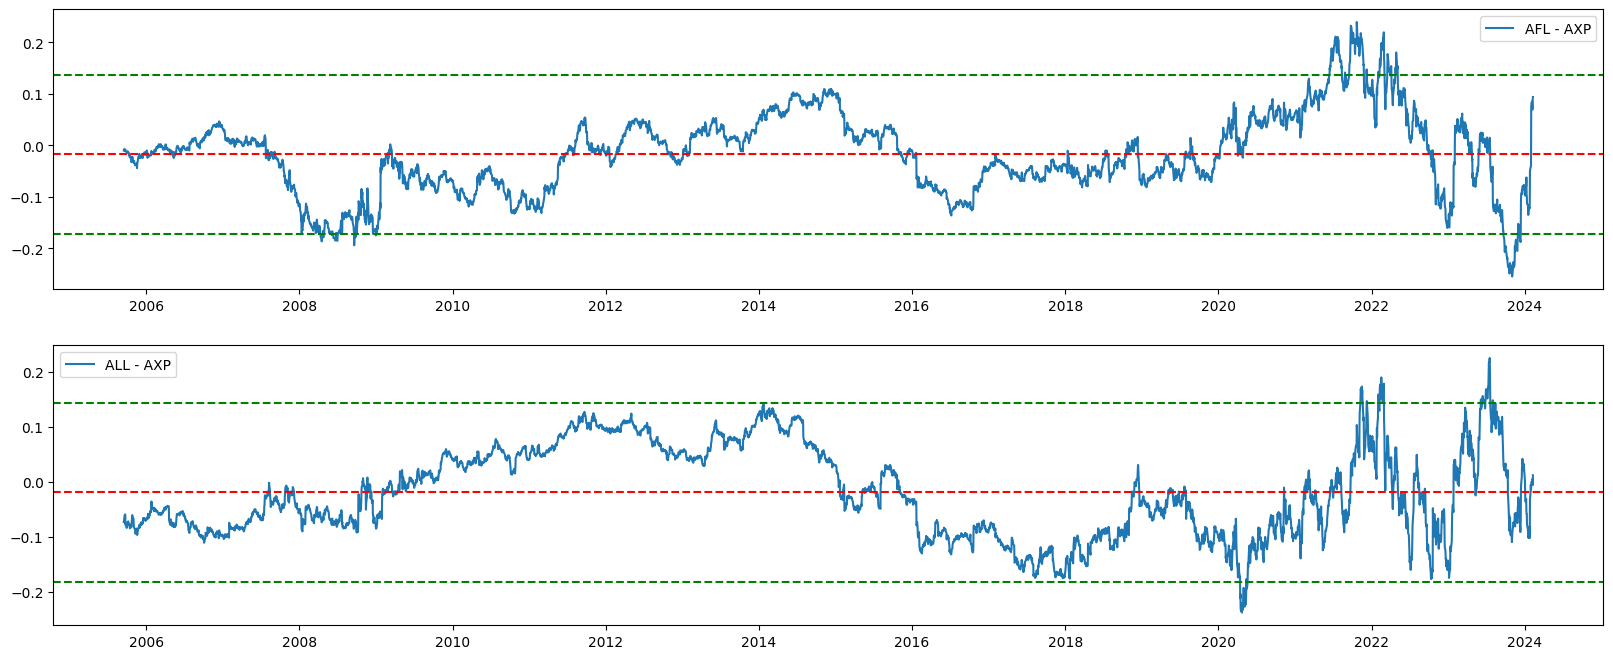

In [144]:
# Plotting difference between stock pairs
no_of_subplots = len(least_ssd_pairs)
Cols = 1
Rows = no_of_subplots // Cols  + (no_of_subplots % Cols != 0)
Position = range(1,no_of_subplots + 1)

fig = plt.figure(1)
for k in range(no_of_subplots):
    std_2_high = np.mean(diff_df[least_ssd_pairs[k]]) + (np.std(diff_df[least_ssd_pairs[k]]) * 2)
    std_2_low = np.mean(diff_df[least_ssd_pairs[k]]) - (np.std(diff_df[least_ssd_pairs[k]]) * 2)
    ax = fig.add_subplot(Rows,Cols,Position[k])
    ax.plot(diff_df.index.to_pydatetime(), diff_df[least_ssd_pairs[k]])
    ax.axhline(np.mean(diff_df[least_ssd_pairs[k]]), color='red', linestyle='--')
    ax.axhline(std_2_high, color='green', linestyle='--')
    ax.axhline(std_2_low, color='green', linestyle='--')
    ax.legend([least_ssd_pairs[k]])

    above_crossing = diff_df.index[((diff_df[least_ssd_pairs[k]] > std_2_high) & (diff_df[least_ssd_pairs[k]].shift(1) <= std_2_high))].to_list()
    below_crossing = diff_df.index[((diff_df[least_ssd_pairs[k]] < std_2_low) & (diff_df[least_ssd_pairs[k]].shift(1) >= std_2_low))].to_list()
    print(above_crossing)
    print(below_crossing)

    
fig.set_size_inches(20, 8)

In [86]:
print(diff_df.loc('2005-09-19', 'AFL - ALL'))



TypeError: _LocationIndexer.__call__() takes from 1 to 2 positional arguments but 3 were given

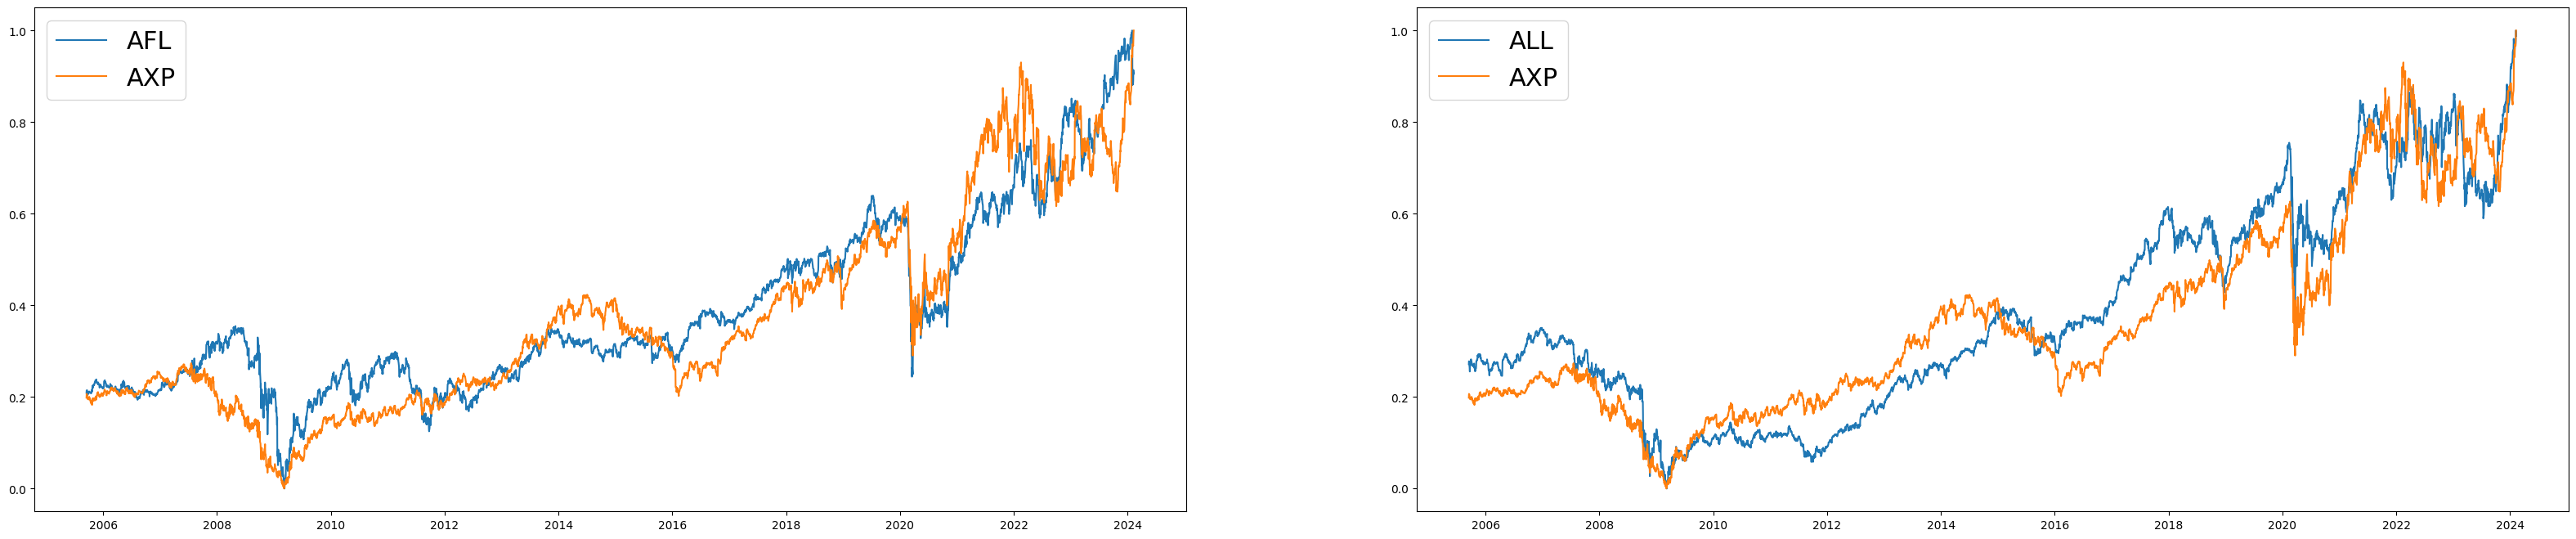

In [75]:
no_of_subplots = len(least_ssd_pairs)
Cols = 2
Rows = no_of_subplots // Cols  + (no_of_subplots % Cols != 0)
Position = range(1,no_of_subplots + 1)

fig = plt.figure(1)
for k in range(no_of_subplots):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    stock1, stock2 = least_ssd_pairs[k].split(" - ")
    ax.plot(diff_df.index.to_pydatetime(), normclose[stock1])
    ax.plot(diff_df.index.to_pydatetime(), normclose[stock2])
    ax.legend([stock1, stock2], fontsize=22)
fig.set_size_inches(40, 8)

In [76]:
diff_df.describe()

,AFL - ALL,AFL - AXP,AFL - AIG,AFL - AMP,ALL - AXP,ALL - AIG,ALL - AMP,AXP - AIG,AXP - AMP,AIG - AMP
count,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000
mean,0.001952,-0.017626,-0.227681,-0.098075,-0.019577,-0.229632,-0.100027,-0.210055,-0.080449,0.129606
std,0.094364,0.077176,0.400131,0.078569,0.081374,0.407222,0.100103,0.413458,0.064102,0.434596
min,-0.258917,-0.254726,-0.956266,-0.292176,-0.237754,-0.957625,-0.358713,-0.957135,-0.271412,-0.889907
25%,-0.071985,-0.066674,-0.464972,-0.149220,-0.085038,-0.538530,-0.181224,-0.446902,-0.123248,0.058123
50%,0.004332,-0.016615,-0.282898,-0.106231,-0.031713,-0.284242,-0.088739,-0.289052,-0.085396,0.212439
75%,0.068707,0.029569,-0.183469,-0.038804,0.049917,-0.082019,-0.033563,-0.131142,-0.045421,0.323265
max,0.234955,0.239358,0.788786,0.154265,0.224841,0.692041,0.279448,0.758640,0.150934,0.957135
